In [1]:
import math
import os

from driving.env import *
from driving.visualization import *

from stable_baselines.common.vec_env import DummyVecEnv, SubprocVecEnv
from stable_baselines import DQN
from stable_baselines.bench import Monitor
from stable_baselines.results_plotter import load_results, ts2xy

/Users/eugenevinitsky/anaconda3/envs/ai4all/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/eugenevinitsky/anaconda3/envs/ai4all/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/eugenevinitsky/anaconda3/envs/ai4all/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/eugenevinits

In [3]:
env = DrivingEnv()

In [ ]:
def policy(s):
    d, theta = env.map.distance_angle_deg(s[0], s[1], s[2])
    return -200*d -2.0*theta

In [ ]:
h = plot_sim(env, policy)

In [10]:
best_mean_reward, n_steps = -np.inf, 0
best_mean_reward, n_steps = -np.inf, 0

# Create log dir
log_dir = "/tmp/gym/"
os.makedirs(log_dir, exist_ok=True)

def callback(_locals, _globals):
  """
  Callback called at each step (for DQN an others) or after n steps (see ACER or PPO2)
  :param _locals: (dict)
  :param _globals: (dict)
  """
  global n_steps, best_mean_reward
  # Print stats every 1000 calls
  if (n_steps + 1) % 1000 == 0:
      # Evaluate policy training performance
      x, y = ts2xy(load_results(log_dir), 'timesteps')
      if len(x) > 0:
          mean_reward = np.mean(y[-100:])
          print(x[-1], 'timesteps')
          print("Best mean reward: {:.2f} - Last mean reward per episode: {:.2f}".format(best_mean_reward, mean_reward))

          # New best model, you could save the agent here
          if mean_reward > best_mean_reward:
              best_mean_reward = mean_reward
              # Example for saving best model
              print("Saving new best model")
              _locals['self'].save(log_dir + 'best_model.pkl')
  n_steps += 1
  return True

env = DrivingEnv()
env = Monitor(env, log_dir, allow_early_resets=True)
model = DQN('MlpPolicy', env, verbose=1, tensorboard_log=os.path.join(os.getcwd(), 'tensorboard_logs'),
           exploration_fraction=0.3)
model.learn(total_timesteps=200000)
model.save("deepq_track")
timesteps, reward = ts2xy(load_results(log_dir), 'timesteps')
N = 20
smooth_rew = np.convolve(reward, np.ones((N,))/N, mode='same')
plt.figure()
plt.plot(timesteps[50:-50], smooth_rew[50:-50])
plt.xlabel('smoothed rewards')
plt.ylabel('timesteps')


--------------------------------------
| % time spent exploring  | 98       |
| episodes                | 100      |
| mean 100 episode reward | -203     |
| steps                   | 1975     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 96       |
| episodes                | 200      |
| mean 100 episode reward | -203     |
| steps                   | 3957     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 94       |
| episodes                | 300      |
| mean 100 episode reward | -203     |
| steps                   | 5914     |
--------------------------------------
--------------------------------------
| % time spent exploring  | 92       |
| episodes                | 400      |
| mean 100 episode reward | -203     |
| steps                   | 7981     |
--------------------------------------
--------------------------------------
| % time spent exploring 

--------------------------------------
| % time spent exploring  | 5        |
| episodes                | 3700     |
| mean 100 episode reward | -190     |
| steps                   | 96894    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3800     |
| mean 100 episode reward | -204     |
| steps                   | 99445    |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 3900     |
| mean 100 episode reward | -171     |
| steps                   | 104091   |
--------------------------------------
--------------------------------------
| % time spent exploring  | 2        |
| episodes                | 4000     |
| mean 100 episode reward | -154     |
| steps                   | 110195   |
--------------------------------------
--------------------------------------
| % time spent exploring 

KeyboardInterrupt: 

In [4]:
# Load in a Model if it's already been trained for a bit
model = DQN.load("deepq_track", env)

W0814 10:22:40.913439 4484060608 deprecation_wrapper.py:119] From /Users/eugenevinitsky/anaconda3/envs/ai4all/lib/python3.7/site-packages/stable_baselines/common/tf_util.py:98: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0814 10:22:40.914535 4484060608 deprecation_wrapper.py:119] From /Users/eugenevinitsky/anaconda3/envs/ai4all/lib/python3.7/site-packages/stable_baselines/common/tf_util.py:107: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.

W0814 10:22:40.916369 4484060608 deprecation_wrapper.py:119] From /Users/eugenevinitsky/anaconda3/envs/ai4all/lib/python3.7/site-packages/stable_baselines/deepq/dqn.py:123: The name tf.train.AdamOptimizer is deprecated. Please use tf.compat.v1.train.AdamOptimizer instead.

W0814 10:22:40.917244 4484060608 deprecation_wrapper.py:119] From /Users/eugenevinitsky/anaconda3/envs/ai4all/lib/python3.7/site-packages/stable_baselines/deepq/build_graph.py:358: The name tf.variable_scope i

In [ ]:
# Example Policy that students should write using the step model from stable-baselines.DQN
# ALL POLICIES NOW ARE IN TERMS OF X,Y,& THETA
def cutePolicy(x,y,theta):
#     x = s[0]
#     y = s[1]
#     theta = s[2]
    
    best_a = 0
    best_q = -math.inf
    estimates = model.step_model.step([[x,y,theta],])[1][0]
#     print(estimates)
    for i in range(0, 5):
        if estimates[i] > best_q:
            best_q = estimates[i]
            best_a = i
            
    return env.actions[best_a]
        

In [6]:
def dqnPolicy(x,y,theta):
    best_a = model.predict([x,y,theta])[0]
    return env.actions[best_a]

In [ ]:
dqnPolicy(0.5,0.5, 0)

In [ ]:
model.step_model.step([[10,10,0],])

In [ ]:
hist = plot_sim(env, cutePolicy)

In [ ]:
env2.actions

In [ ]:
plot_episode(env,cutePolicy)

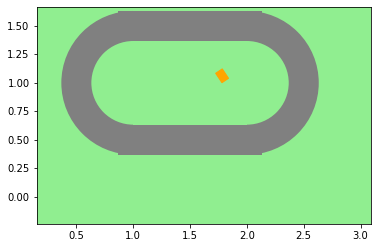

In [7]:
x = animate(env, dqnPolicy, dt=0.2)

In [8]:
x

In [ ]:
# with open('animation.html', 'w') as f:
#     f.write(x.data)